In [1]:
import numpy as np # linear algebra 
import pandas as pd # data processing 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = df.iloc[:,2:]

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
101,28,59000,0
391,47,23000,1
317,35,55000,0
50,24,32000,0
153,36,50000,0


 Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),
                                                df['Purchased'],test_size = 0.3,
                                                random_state=0)
x_train.shape, x_test.shape

((280, 2), (120, 2))

StandardScaler

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit the scaler to the train set, it will learn the parameter
scaler.fit(x_train)

#transforming train and test set 
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [8]:
# convert data frame
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [9]:
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [10]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [68]:
np.round(x_train_scaled.describe(),1)


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


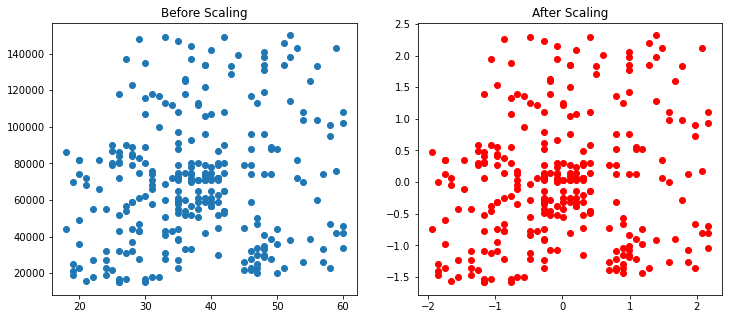

In [11]:
# scatter plot difference 
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

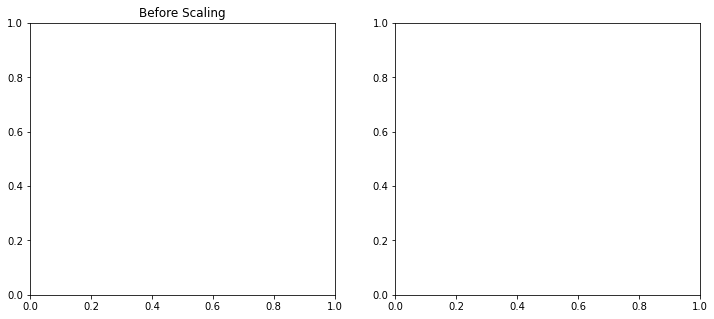

In [13]:
# Plot PDF
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Before Scalingsns.kdeplot(data=tips, x="total_bill")
ax1.set_title('Before Scaling')
sns.kdeplot(data=x_train['Age'])
sns.kdeplot(data=x_train['EstimatedSalary'])

# After Scaling
ax2.set_title('After Scaling')
sns.kdeplot(data=x_train_scaled[:, 0].flatten(), ax=ax2)  # Assuming 'Age' is the first column after scaling
sns.kdeplot(data=x_train_scaled[:, 1].flatten(), ax=ax2)  # Assuming 'EstimatedSalary' is the second column after scaling

plt.show()
